In [16]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def load_image(file_name: str): 
    """
    load image(.png) and convert into np.ndarray
    """

    image = cv2.imread(file_name)
    image = image[..., ::-1] # BGR -> RGB
    image = image / 255.0 # float64
    image = image.astype('float32') # float64 -> float32
    return image

def load_dir(dir_name: str):
    """
    load all images in the dir 
    """
    output = []
    path_in_dir = glob.glob(dir_name + "/*.png")
    for path in path_in_dir:
        image = load_image(path)
        output.append(image)
    output = np.array(output)
    return output

def load_each_set(set_name: str):
    """
    load each dataset (train, val and test)
    """
    x = []
    y = []
    for label in [0, 1]:
        dataset = load_dir('Dataset/' + set_name + '/' + str(label) +'/')
        for data in dataset:
            x.append(data)
            y.append(np.array([label]).astype(np.uint8))
    return np.array(x), np.array(y)

def load_all_set():
    """
    load all dataset
    """
    x_train, y_train = load_each_set('train')
    x_val, y_val = load_each_set('val')
    x_test, y_test = load_each_set('test') 

    return x_train, y_train, x_val, y_val, x_test, y_test

def plot_image(image: np.ndarray):
    plt.figure(figsize=(7,7))
    plt.axis('off')
    plt.imshow(image, cmap="gray")

(224, 224, 3)
<class 'numpy.ndarray'>
float32
0.9647059 0.0


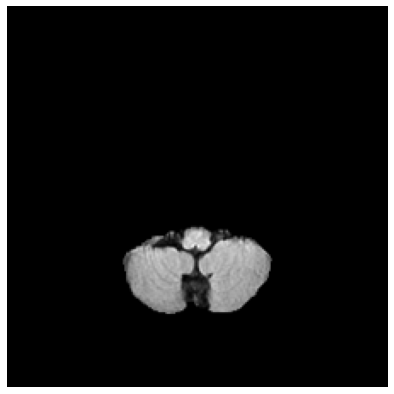

In [18]:
image = load_image("Dataset/train/0/1.png")
print(image.shape)
print(type(image))
print(image.dtype)
print(image.max(), image.min())
plot_image(image)

(224, 224, 3)
<class 'numpy.ndarray'>
float32
1.0 0.0


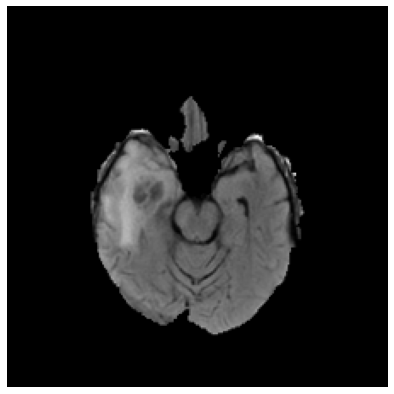

In [19]:
train_neg_images =load_dir("Dataset/train/0/")
image = train_neg_images[0]
print(image.shape)
print(type(image))
print(image.dtype)
print(image.max(), image.min())
plot_image(image)

(224, 224, 3)
<class 'numpy.ndarray'>
float32
1.0 0.0
<class 'numpy.ndarray'>
uint8


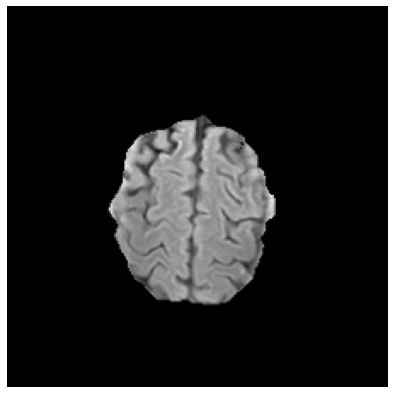

In [21]:
x_train, y_train = load_each_set('train')
image = x_train[0]
label = y_train[0]
print(image.shape)
print(type(image))
print(image.dtype)
print(image.max(), image.min())
print(type(label))
print(label.dtype)
plot_image(image)